In [2]:
import pandas as pd
import numpy as np

## 1.

In [3]:
df=pd.read_csv("Baltimore911.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_21136\3446461591.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Baltimore911.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292761 entries, 0 to 292760
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        292761 non-null  object 
 1   CrimeTime        292735 non-null  object 
 2   CrimeCode        292761 non-null  object 
 3   Location         291425 non-null  object 
 4   Description      292761 non-null  object 
 5   Inside/Outside   259001 non-null  object 
 6   Weapon           61532 non-null   object 
 7   Post             290385 non-null  object 
 8   District         292761 non-null  object 
 9   Neighborhood     282257 non-null  object 
 10  Longitude        291126 non-null  float64
 11  Latitude         291126 non-null  float64
 12  Location 1       0 non-null       float64
 13  Premise          258749 non-null  object 
 14  vri_name1        34584 non-null   object 
 15  Total Incidents  292761 non-null  int64  
dtypes: float64(3), int64(1), object(12)
me

From above result, there are some null values in few columns, before drawing any conclusions we need to work on cleaning the data set.

In [5]:
df.isna().sum()

CrimeDate               0
CrimeTime              26
CrimeCode               0
Location             1336
Description             0
Inside/Outside      33760
Weapon             231229
Post                 2376
District                0
Neighborhood        10504
Longitude            1635
Latitude             1635
Location 1         292761
Premise             34012
vri_name1          258177
Total Incidents         0
dtype: int64

In [7]:
df['Location 1'].unique()

array([nan])

'Location 1' column contains all null values, there is no use of it in the data set.

In [4]:
df.drop('Location 1',axis=1,inplace=True)

In [11]:
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise,vri_name1,Total Incidents
0,02/08/2020,2:18:00,5D,1700 CLIFTVIEW AVE,BURGLARY,I,NaN,312.0,EASTERN,DARLEY PARK,-76.593870,39.315341,GROCERY/CONFECTION,Eastern 1,1
1,02/08/2020,6:00:00,6G,700 N STREEPER ST,LARCENY,I,NaN,333.0,EASTERN,MADISON EASTEND,-76.577425,39.299094,ROW/TOWNHOUSE-OCC,NaN,1
2,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314.0,EASTERN,OLIVER,-76.594992,39.306941,ROW/TOWNHOUSE-OCC,NaN,1
3,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314.0,EASTERN,OLIVER,-76.594992,39.306941,ROW/TOWNHOUSE-OCC,NaN,1
4,02/08/2020,17:30:00,5A,1600 E OLIVER ST,BURGLARY,I,NaN,314.0,EASTERN,OLIVER,-76.595946,39.307350,ROW/TOWNHOUSE-OCC,Eastern 1,1


In [15]:
df[ df['CrimeTime'].isnull() ]

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise,vri_name1,Total Incidents
2361,01/15/2020,NaN,1A,200 W BALTIMORE ST,HOMICIDE,Outside,FIREARM,114.0,CENTRAL,NaN,-76.617843,39.289506,STREET,NaN,1
4987,12/20/2019,NaN,1A,2000 BOYD ST,HOMICIDE,Outside,FIREARM,815.0,SOUTHWEST,NaN,-76.648640,39.286645,STREET,Tri-District,1
7099,12/01/2019,NaN,9S,500 E COLD SPRING LA,SHOOTING,Outside,FIREARM,524.0,NORTHERN,NaN,-76.609528,39.346229,STREET,NaN,1
22817,08/03/2019,NaN,1A,NaN,HOMICIDE,Inside,FIREARM,525.0,NORTHERN,NaN,-76.601008,39.340709,DWELLING,NaN,1
25400,07/16/2019,NaN,1A,200 N MOUNT ST,HOMICIDE,Inside,FIREARM,711.0,WESTERN,NaN,-76.644022,39.291458,DWELLING,NaN,1
47115,01/22/2019,NaN,1A,400 N WASHINGTON ST,HOMICIDE,Inside,FIREARM,321.0,EASTERN,NaN,-76.589390,39.296208,COMMON BUSINESS,NaN,1
53900,12/02/2018,NaN,9S,2700 MAYFIELD AV,SHOOTING,Outside,FIREARM,432.0,NORTHEAST,NaN,-76.575610,39.324160,STREET,NaN,1
62456,10/03/2018,NaN,9S,2900 GARRISON BLVD,SHOOTING,Outside,FIREARM,622.0,NORTHWEST,NaN,-76.677166,39.320336,PARKING LOT,NaN,1
81535,05/20/2018,NaN,9S,2600 ELSINORE AV,SHOOTING,Outside,FIREARM,621.0,NORTHWEST,NaN,-76.679401,39.317191,STREET,NaN,1
88979,03/22/2018,NaN,9S,400 DOLPHIN ST,SHOOTING,Outside,FIREARM,123.0,CENTRAL,NaN,-76.626039,39.302214,STREET,NaN,1


In [19]:
print('Number of rows : ',len(df))

Number of rows :  292761


In [20]:
print('Number of columns : ',len(df.columns))

Number of columns :  15


In [21]:
df.describe()

,Longitude,Latitude,Total Incidents
count,291126.000000,291126.000000,292761.0
mean,-76.617452,39.306746,1.0
std,0.043734,0.029658,0.0
min,-81.529189,37.577262,1.0
25%,-76.649094,39.288186,1.0
50%,-76.613977,39.302672,1.0
75%,-76.587080,39.326965,1.0
max,-76.383228,39.661332,1.0


In [24]:
from skimpy import skim

skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 292761 │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 14     │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA     ┃ NA %   ┃ mean   ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Longitude            │   1635 │   0.56 │    -77 │   0.044 │   -82 │   -77 │   -77 │  -77 │   -76 │      ▇  │  │
│ │ Latitude             │   1635 │   0.56 │     39 │    0.03 │    38 │    39 │    39 │   39 │    40 │     ▇▅  │  │
│ │ Total Incidents      │      0 │      0 │      1 │       0 │     1 │     1 │     1 │    1 │     1 │     ▇   │  │
│ └──────────────────────┴────────┴────────┴────────┴─────────┴───────┴───────┴───────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                 ┃ NA           ┃ NA %        ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CrimeDate                   │            0 │           0 │                        1 │               292761 │  │
│ │ CrimeTime                   │           26 │        0.01 │                        1 │               292735 │  │
│ │ CrimeCode                   │            0 │           0 │                        1 │               292761 │  │
│ │ Location                    │         1336 │        0.46 │                      3.4 │              1000942 │  │
│ │ Description                 │            0 │           0 │                      1.8 │               539328 │  │
│ │ Inside/Outside              │        33760 │       11.53 │                     0.88 │               259001 │  │
│ │ Weapon                      │       231229 │       78.98 │                     0.21 │                61532 │  │
│ │ District                    │            0 │           0 │                        1 │               292761 │  │
│ │ Neighborhood                │        10504 │        3.59 │                      1.6 │               461736 │  │
│ │ Premise                     │        34012 │       11.62 │                      1.3 │               367241 │  │
│ │ vri_name1                   │       258177 │       88.19 │                     0.15 │                42654 │  │
│ └─────────────────────────────┴──────────────┴─────────────┴──────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [41]:
categorical_columns = df.select_dtypes(include=['object', 'category'])

In [44]:
categorical_columns.columns[0]

'CrimeDate'

In [47]:
for i in categorical_columns.columns:
    print( "The number of unique values in ",i,'column are: ' ,len( df[i].unique() ) )

The number of unique values in  CrimeDate column are:  2300
The number of unique values in  CrimeTime column are:  1476
The number of unique values in  CrimeCode column are:  81
The number of unique values in  Location column are:  27065
The number of unique values in  Description column are:  14
The number of unique values in  Inside/Outside column are:  5
The number of unique values in  Weapon column are:  6
The number of unique values in  Post column are:  260
The number of unique values in  District column are:  10
The number of unique values in  Neighborhood column are:  279
The number of unique values in  Premise column are:  126
The number of unique values in  vri_name1 column are:  9


In [49]:
print("Location, CrimeDate and CrimeTime are the  columns with largest count")

Location, CrimeDate and CrimeTime are the  columns with largest count


## 2. Generate a series of plots to describe the temporal pattern (year-to-year, monthly, and day-of-week) of the overall crime incidence aggregating from all geo-locations;

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])

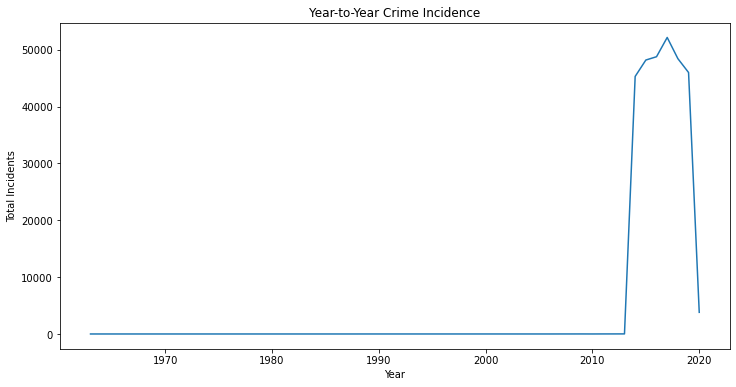

In [54]:
# yearly pattern

plt.figure(figsize=(12, 6))
df['Year'] = df['CrimeDate'].dt.year
yearly_counts = df['Year'].value_counts().sort_index()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.title('Year-to-Year Crime Incidence')
plt.show()


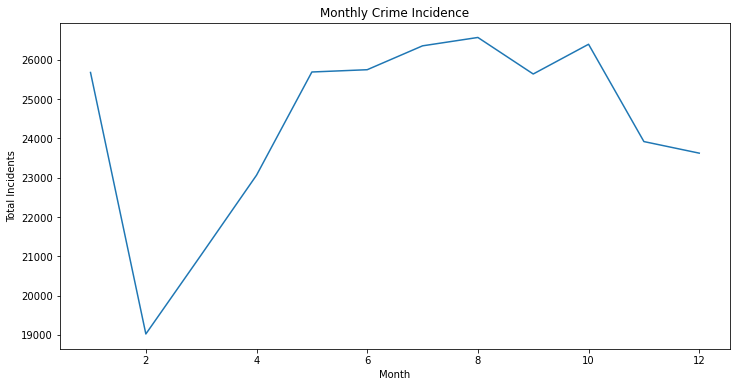

In [56]:
# Monthly pattern
plt.figure(figsize=(12, 6))
monthly_counts = df['CrimeDate'].dt.month.value_counts().sort_index()
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Total Incidents')
plt.title('Monthly Crime Incidence')
plt.show()


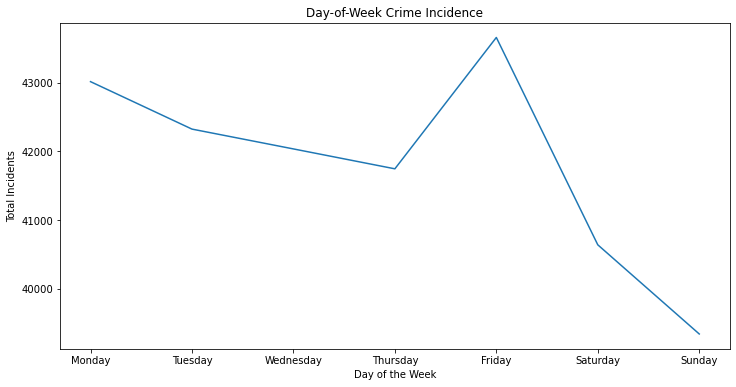

In [58]:
#Day-of-Week Pattern:

plt.figure(figsize=(12, 6))
day_of_week_counts = df['CrimeDate'].dt.dayofweek.value_counts().sort_index()
sns.lineplot(x=day_of_week_counts.index, y=day_of_week_counts.values)
plt.xlabel('Day of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.ylabel('Total Incidents')
plt.title('Day-of-Week Crime Incidence')
plt.show()


## 3. Generate a plot describing the distribution of crime type aggregating from all geo-locations and all time periods

In [14]:
df['Description'].value_counts()

LARCENY                 65508
COMMON ASSAULT          48061
BURGLARY                42237
LARCENY FROM AUTO       38977
AGG. ASSAULT            31706
AUTO THEFT              25832
ROBBERY - STREET        20779
ROBBERY - COMMERCIAL     5190
SHOOTING                 3869
ROBBERY - RESIDENCE      2984
ROBBERY - CARJACKING     2554
HOMICIDE                 1902
RAPE                     1891
ARSON                    1271
Name: Description, dtype: int64

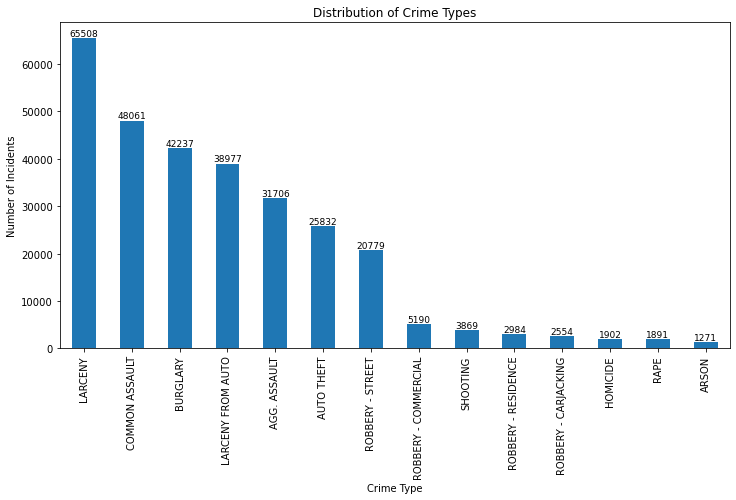

In [19]:
from itertools import cycle
plt.figure(figsize=(12, 6))
ax=df['Description'].value_counts().plot(kind='bar')
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90) 

for i, v in enumerate(crime_type_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=9)
    
plt.show()

## 4. Generate a series of plots to illustrate how crime type distributions might vary from year-to-year, month-to-month, or by day-of-week aggregating across all locations.


In [21]:
# Extracting year, month, and day of the week from 'CrimeDate' column
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.day_name()

In [23]:
df.head()[['Year','Month','DayOfWeek']]

,Year,Month,DayOfWeek
0,2020,2,Saturday
1,2020,2,Saturday
2,2020,2,Saturday
3,2020,2,Saturday
4,2020,2,Saturday


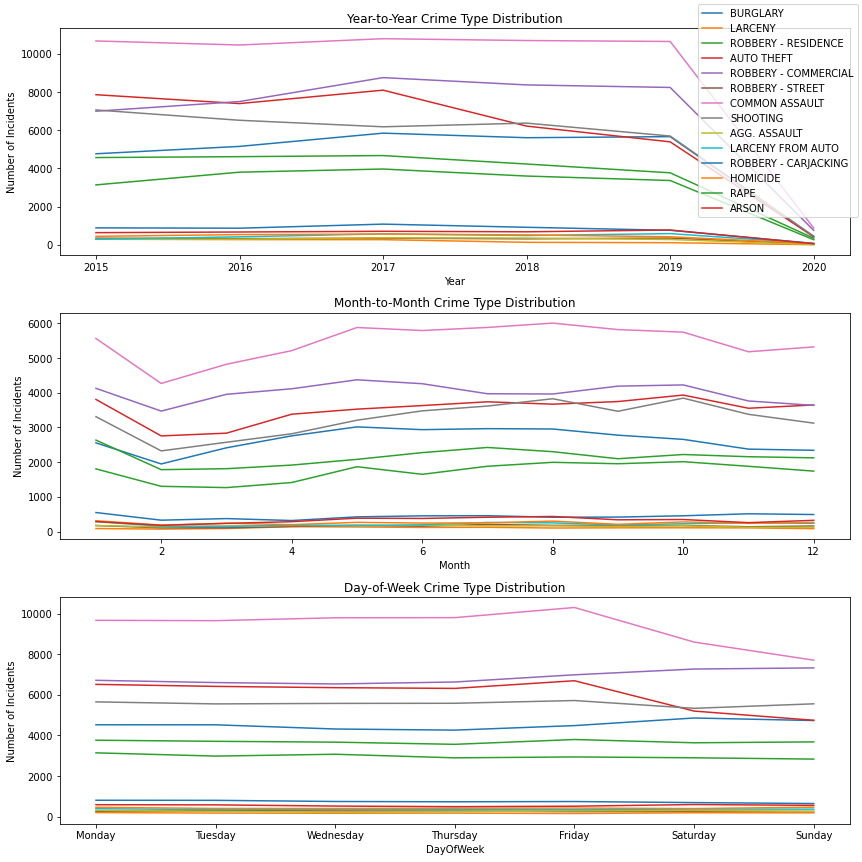

In [25]:
# Creating subplots for year-to-year, month-to-month, and day-of-week variations
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

df1=df[df['CrimeDate'].dt.year >= 2015]

# Year-to-year variation
df1.groupby('Year')['Description'].value_counts().unstack().plot(ax=axes[0], legend=None)
axes[0].set_title('Year-to-Year Crime Type Distribution')
axes[0].set_ylabel('Number of Incidents')

# Month-to-month variation
df.groupby('Month')['Description'].value_counts().unstack().plot(ax=axes[1], legend=None)
axes[1].set_title('Month-to-Month Crime Type Distribution')
axes[1].set_ylabel('Number of Incidents')

# Day-of-week variation
df.groupby('DayOfWeek')['Description'].value_counts().unstack().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).plot(ax=axes[2], legend=None)
axes[2].set_title('Day-of-Week Crime Type Distribution')
axes[2].set_ylabel('Number of Incidents')

# Adding a common legend
fig.legend(loc='upper right', labels=df['Description'].unique())

# Adjusting spacing between subplots
plt.tight_layout()

# Showing the plots
plt.show()